In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

In [ ]:
# To upload kaggle .json file
!pip install kaggle
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nandakumarl","key":"8907c6fe1b7317b97d4b771f90240a7d"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c nlp-getting-started

  0% 0.00/593k [00:00<?, ?B/s]
100% 593k/593k [00:00<00:00, 91.3MB/s]


In [ ]:
!unzip nlp-getting-started.zip -d data

Archive:  nlp-getting-started.zip
  inflating: data/sample_submission.csv  
  inflating: data/test.csv           
  inflating: data/train.csv          


In [ ]:
import os
dir_name = "/content/data/"

In [ ]:
os.listdir(dir_name)

['test.csv', 'sample_submission.csv', 'train.csv']

##Exploratory Data analysis :

In [ ]:
# loading all datasets
df_train=pd.read_csv("/content/data/train.csv")
df_test=pd.read_csv("/content/data/test.csv")

In [ ]:
# Finding out the shape of each dataframes to get the intuition of problem
df_train.shape

(7613, 5)

In [ ]:
df_test.shape

(3263, 4)

In [ ]:
# Finding out the columns of each dataframes 
df_train.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
df_test.head(5)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
# To get the info of train and test files
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


#Observation:
* Train datasets have 7613 nos line items with five columns as id, keywords, location,text, target
* Test datasets have 3263 nos line items with four columns as id, keywords,location,text
* From above info table found that , some values in keyword and location are empty i.e NAN values both in test and train datasets

In [ ]:
# lets do EDA on each columns
print("Target(in nos):")
df_train['target'].value_counts()

Target(in nos):


0    4342
1    3271
Name: target, dtype: int64

**Observation:**
Out of 7613 datas, 4342 belongs to class 0(not a disaster text) and 3271 
belongs to class 1 (disaster tweet)

In [ ]:
print("Target(in %):")
(df_train['target'].value_counts()/df_train['target'].count())*100

Target(in %):


0    57.034021
1    42.965979
Name: target, dtype: float64

Observation: Out of 7613 datas, 57% belongs to class 0(not a disaster text) and 42% belongs to class 1 (disaster tweet)

Text(0.5, 1.0, 'Percentage contribution of target')

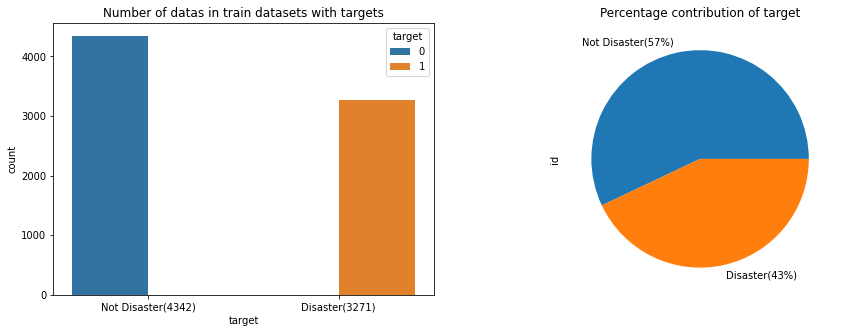

In [ ]:
#lets plot above datas in bar plot and pie chart
fig,axes = plt.subplots(ncols=2,figsize=(15,5))
sns.countplot(x=df_train['target'], hue=df_train['target'],ax=axes[0])
axes[0].set_xticklabels(['Not Disaster(4342)', 'Disaster(3271)'])
axes[0].set_title("Number of datas in train datasets with targets")
df_train.groupby('target').count()['id'].plot(kind='pie',ax=axes[1],labels=['Not Disaster(57%)', 'Disaster(43%)'])
axes[1].set_title("Percentage contribution of target")


#lets analysis keyword and location columns in both train and test datasets

In [ ]:
# lets find number of NAN value in keyword and location in both train and test datasets
print("Number of NAN value in keyword of train datasets:{} and percentage {:.2f}".format(df_train['keyword'].isnull().sum(),(df_train['keyword'].isnull().sum()/df_train['keyword'].count()*100)))
print("Number of NAN value in keyword of test datasets:{} and percentage {:.2f}".format(df_test['keyword'].isnull().sum(),(df_test['keyword'].isnull().sum()/df_test['keyword'].count()*100)))
print("***************")
print("Number of NAN value in location of train datasets:{} and percentage {:.2f}".format(df_train['location'].isnull().sum(),(df_train['location'].isnull().sum()/df_train['location'].count()*100)))
print("Number of NAN value in location of test datasets:{} and percentage {:.2f}".format(df_test['location'].isnull().sum(),(df_test['location'].isnull().sum()/df_test['location'].count()*100)))

Number of NAN value in keyword of train datasets:61 and percentage 0.81
Number of NAN value in keyword of test datasets:26 and percentage 0.80
***************
Number of NAN value in location of train datasets:2533 and percentage 49.86
Number of NAN value in location of test datasets:1105 and percentage 51.20


#Observation: 
*Both in train and test datasets, 0.8% of keywords has NAN Value
*In train datasets, 49.86% of location has NAN Value
*In test datasets, 51.20% of location has NAN Value

# Top most occuring Keywords

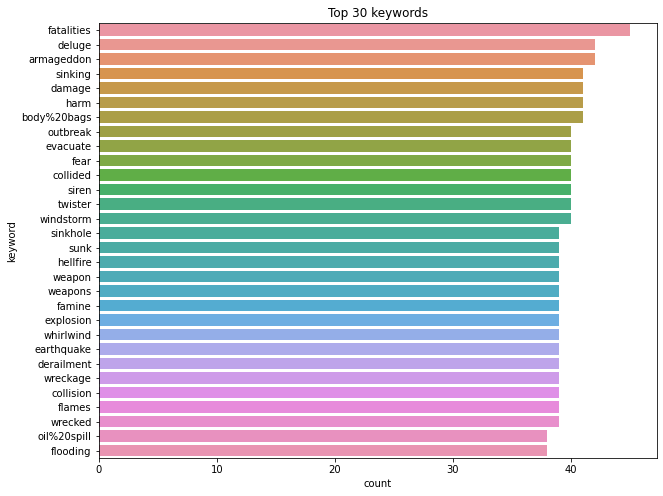

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(y=df_train.keyword, order = df_train.keyword.value_counts().iloc[:30].index)
plt.title('Top 30 keywords')
plt.show()

Observation:
* Above plot clearly shows fatalities,deludge,armagedeen and sinking are the top keywords occurs many times

# TOP Keywords in Disaster and non- disaster tweet 

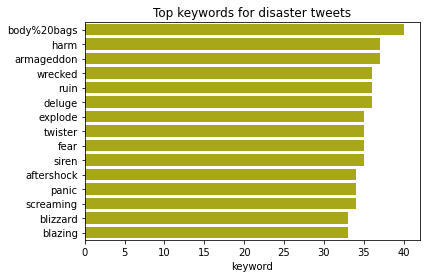

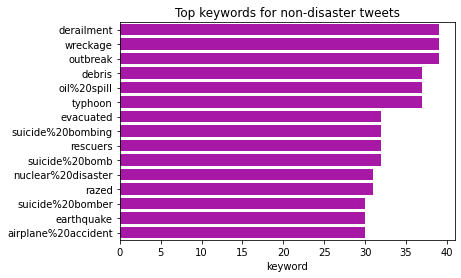

In [ ]:
keyword_nondisaster = df_train[df_train.target==0].keyword.value_counts().head(15)
keyword_disaster = df_train[df_train.target==1].keyword.value_counts().head(15)

sns.barplot(keyword_nondisaster, keyword_nondisaster.index, color='y')
plt.title('Top keywords for disaster tweets')
plt.show()
sns.barplot(keyword_disaster, keyword_disaster.index, color='m')
plt.title('Top keywords for non-disaster tweets')
plt.show()

Observation:

In non- disaster keywords like Outbreak, suicidebomb, nucleardisaster by words this seems to be disaster tweet but along with sequence its found to be non disaster tweet. We need to capture this in our model

In [ ]:
# lets find out number of unique data values in keyword comparing with train and test data

print("Number of unique values in keyword :Train datasets :{} and Test datasets:{}".format(df_train['keyword'].nunique(),df_test['keyword'].nunique()))

Number of unique values in keyword :Train datasets :221 and Test datasets:221


#Observation: 
*Number of unique words in keyword is 221(2.9%) out of 7552 keywords available in train datasets

#Top most occuring location

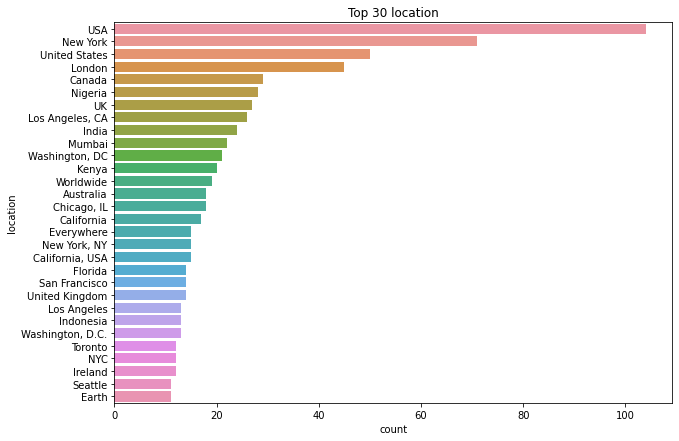

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(y=df_train.location, order = df_train.location.value_counts().iloc[:30].index)
plt.title('Top 30 location')
plt.show()

#Observation: 
*From above plot found that , USA and Newyork are top two location where tweets are sent
* USA and United states are same country but it was taken as different location

# TOP location in Disaster and non- disaster tweet 

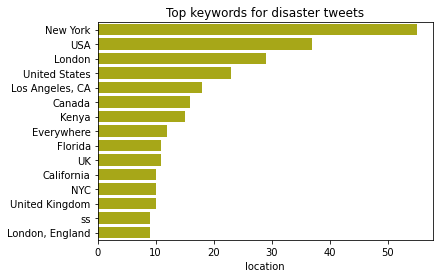

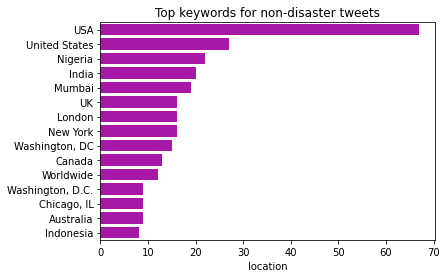

In [ ]:
location_nondisaster = df_train[df_train.target==0].location.value_counts().head(15)
location_disaster = df_train[df_train.target==1].location.value_counts().head(15)

sns.barplot(location_nondisaster,location_nondisaster.index, color='y')
plt.title('Top keywords for disaster tweets')
plt.show()
sns.barplot(location_disaster, location_disaster.index, color='m')
plt.title('Top keywords for non-disaster tweets')
plt.show()

Observation:
*More number of tweets from new york are disaster tweet than non disaster
*More number of disaster tweet are sent from newyork, USA and london location


In [ ]:
# lets find out number of unique data values in location columns comparing with train and test data
print("Number of unique values in location :Train datasets :{} and Test datasets:{}".format(df_train['location'].nunique(),df_test['location'].nunique()))

Number of unique values in location :Train datasets :3341 and Test datasets:1602


#Observation:
*Number of unique words in location is 3341(43.8%) out of 7613 location available in train datasets
*Since more number of keyword and location are common and has NAN value.using this feature will reduce the model performance will see how we can tackle this

# Lets do analysis, preprocessing and featurization on text datas

In [ ]:
df_train['text'].head(5)

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

#Using word cloud for visualization of words in text

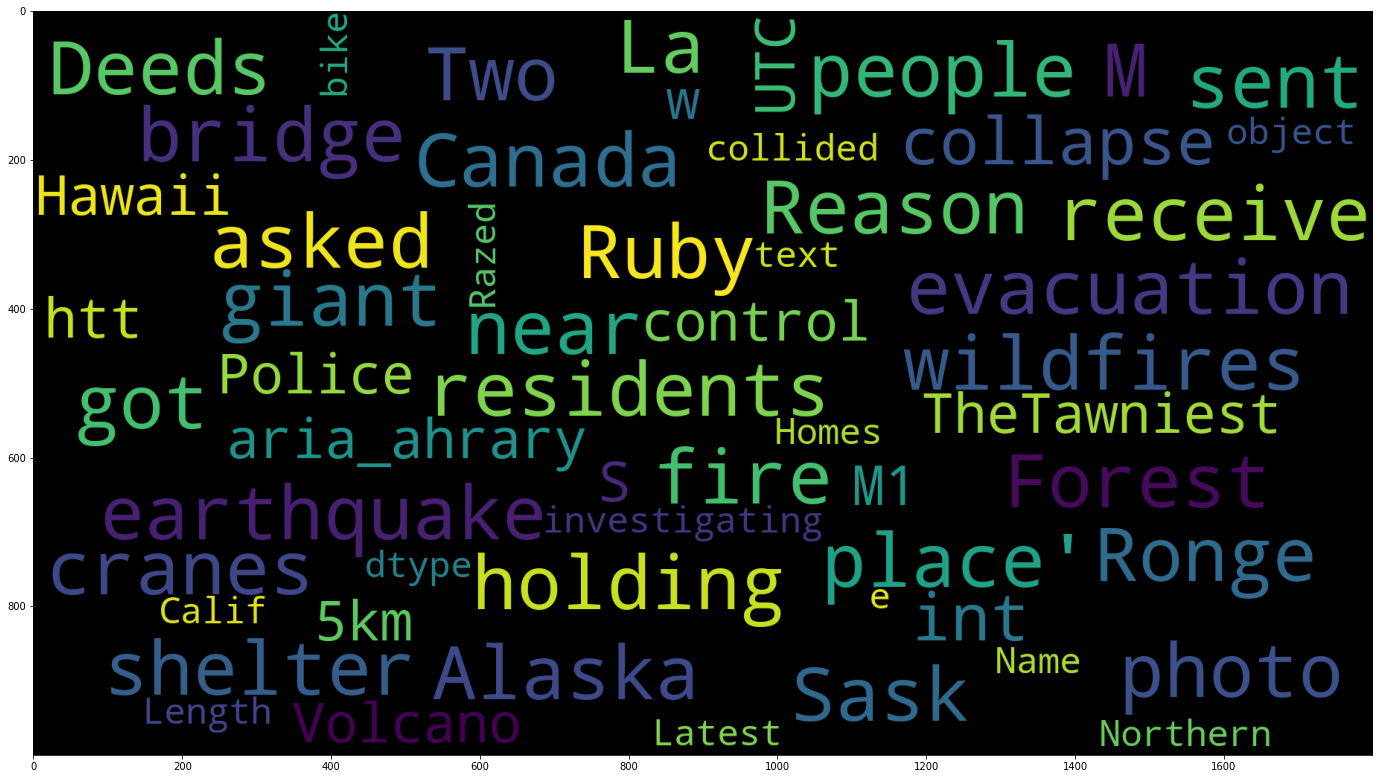

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords= set(STOPWORDS)
plt.figure(figsize=(24,16))
wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = 200,
                    max_font_size = 100, 
                    random_state = 42,
                    width=1800, 
                    height=1000)
wordcloud.generate(str(df_train['text']))
plt.imshow(wordcloud)

Observation: 
from above plot we can see words like earthquake , volcano, forest, bridge, evacuation,residents,shelter,sask,alaska,holiding,reason,collapse,recieve are occurs more frequently

#Lets frequency of each word in disaster and non disaster


In [ ]:
#https://www.kaggle.com/code/sudalairajkumar/simple-exploration-notebook-qiqc/notebook
from collections import defaultdict
df_train1=df_train[df_train["target"]==1]
df_train0=df_train[df_train["target"]==0]

def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]


disaster_unigrams = defaultdict(int)
nondisaster_unigrams = defaultdict(int)

for tweet in df_train1['text']:
    for word in generate_ngrams(tweet):
        disaster_unigrams[word] += 1
for tweet in df_train0['text']:
    for word in generate_ngrams(tweet):
        nondisaster_unigrams[word] += 1

df_disaster_unigrams = pd.DataFrame(sorted(disaster_unigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_unigrams = pd.DataFrame(sorted(nondisaster_unigrams.items(), key=lambda x: x[1])[::-1])

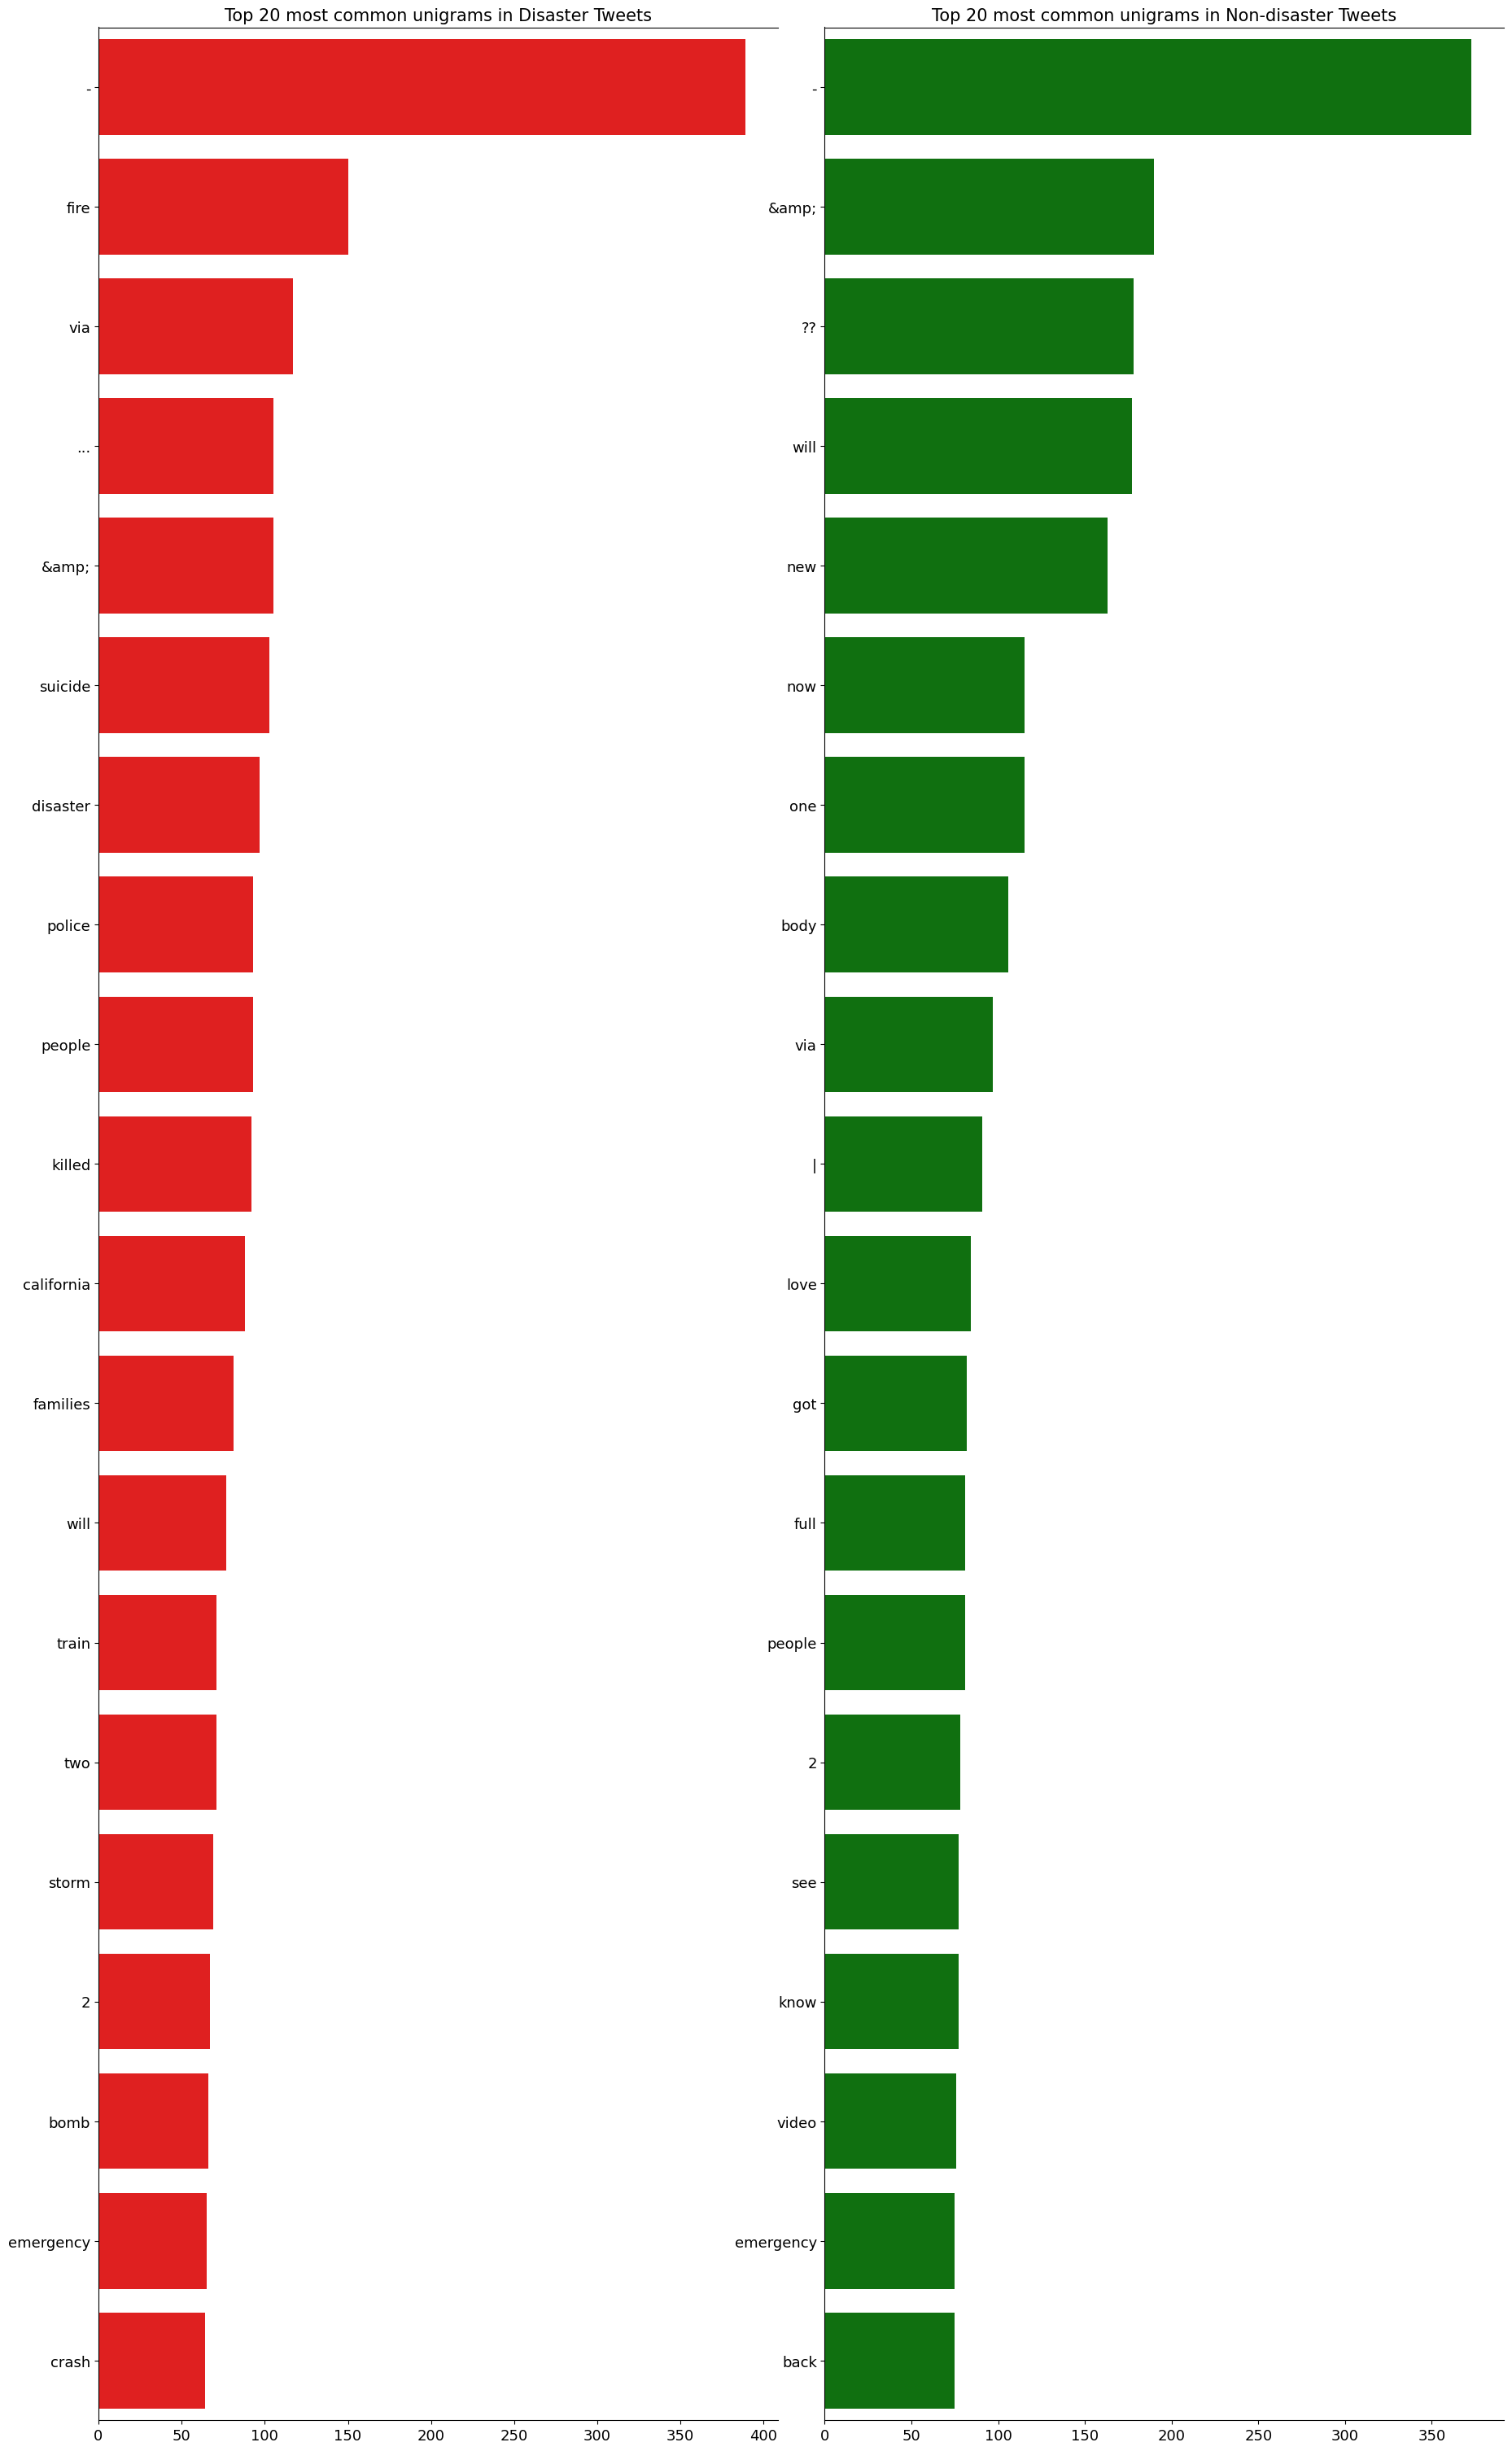

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 30), dpi=100)
plt.tight_layout()

sns.barplot(y=df_disaster_unigrams[0].values[:20], x=df_disaster_unigrams[1].values[:20], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_unigrams[0].values[:20], x=df_nondisaster_unigrams[1].values[:20], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top 20 most common unigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top 20 most common unigrams in Non-disaster Tweets', fontsize=15)

plt.show()

Observation:
* From above plot , we can see that words like emergency, @amp, people are occurs in both the tweets (disaster/ & non disaster). We need to build the model to understand the sequence of words to classify tweets as disaster or non disaster. Lets try bigram for more understanding
* Data cleaning/preprocessing is required since dot, @amp,?? and ... are occurs in the text datasets 


In [ ]:
# lets for bigrams
disaster_bigrams = defaultdict(int)
nondisaster_bigrams = defaultdict(int)

for tweet in df_train1['text']:
    for word in generate_ngrams(tweet,2):
        disaster_bigrams[word] += 1
for tweet in df_train0['text']:
    for word in generate_ngrams(tweet,2):
        nondisaster_bigrams[word] += 1

df_disaster_bigrams = pd.DataFrame(sorted(disaster_bigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_bigrams = pd.DataFrame(sorted(nondisaster_bigrams.items(), key=lambda x: x[1])[::-1])

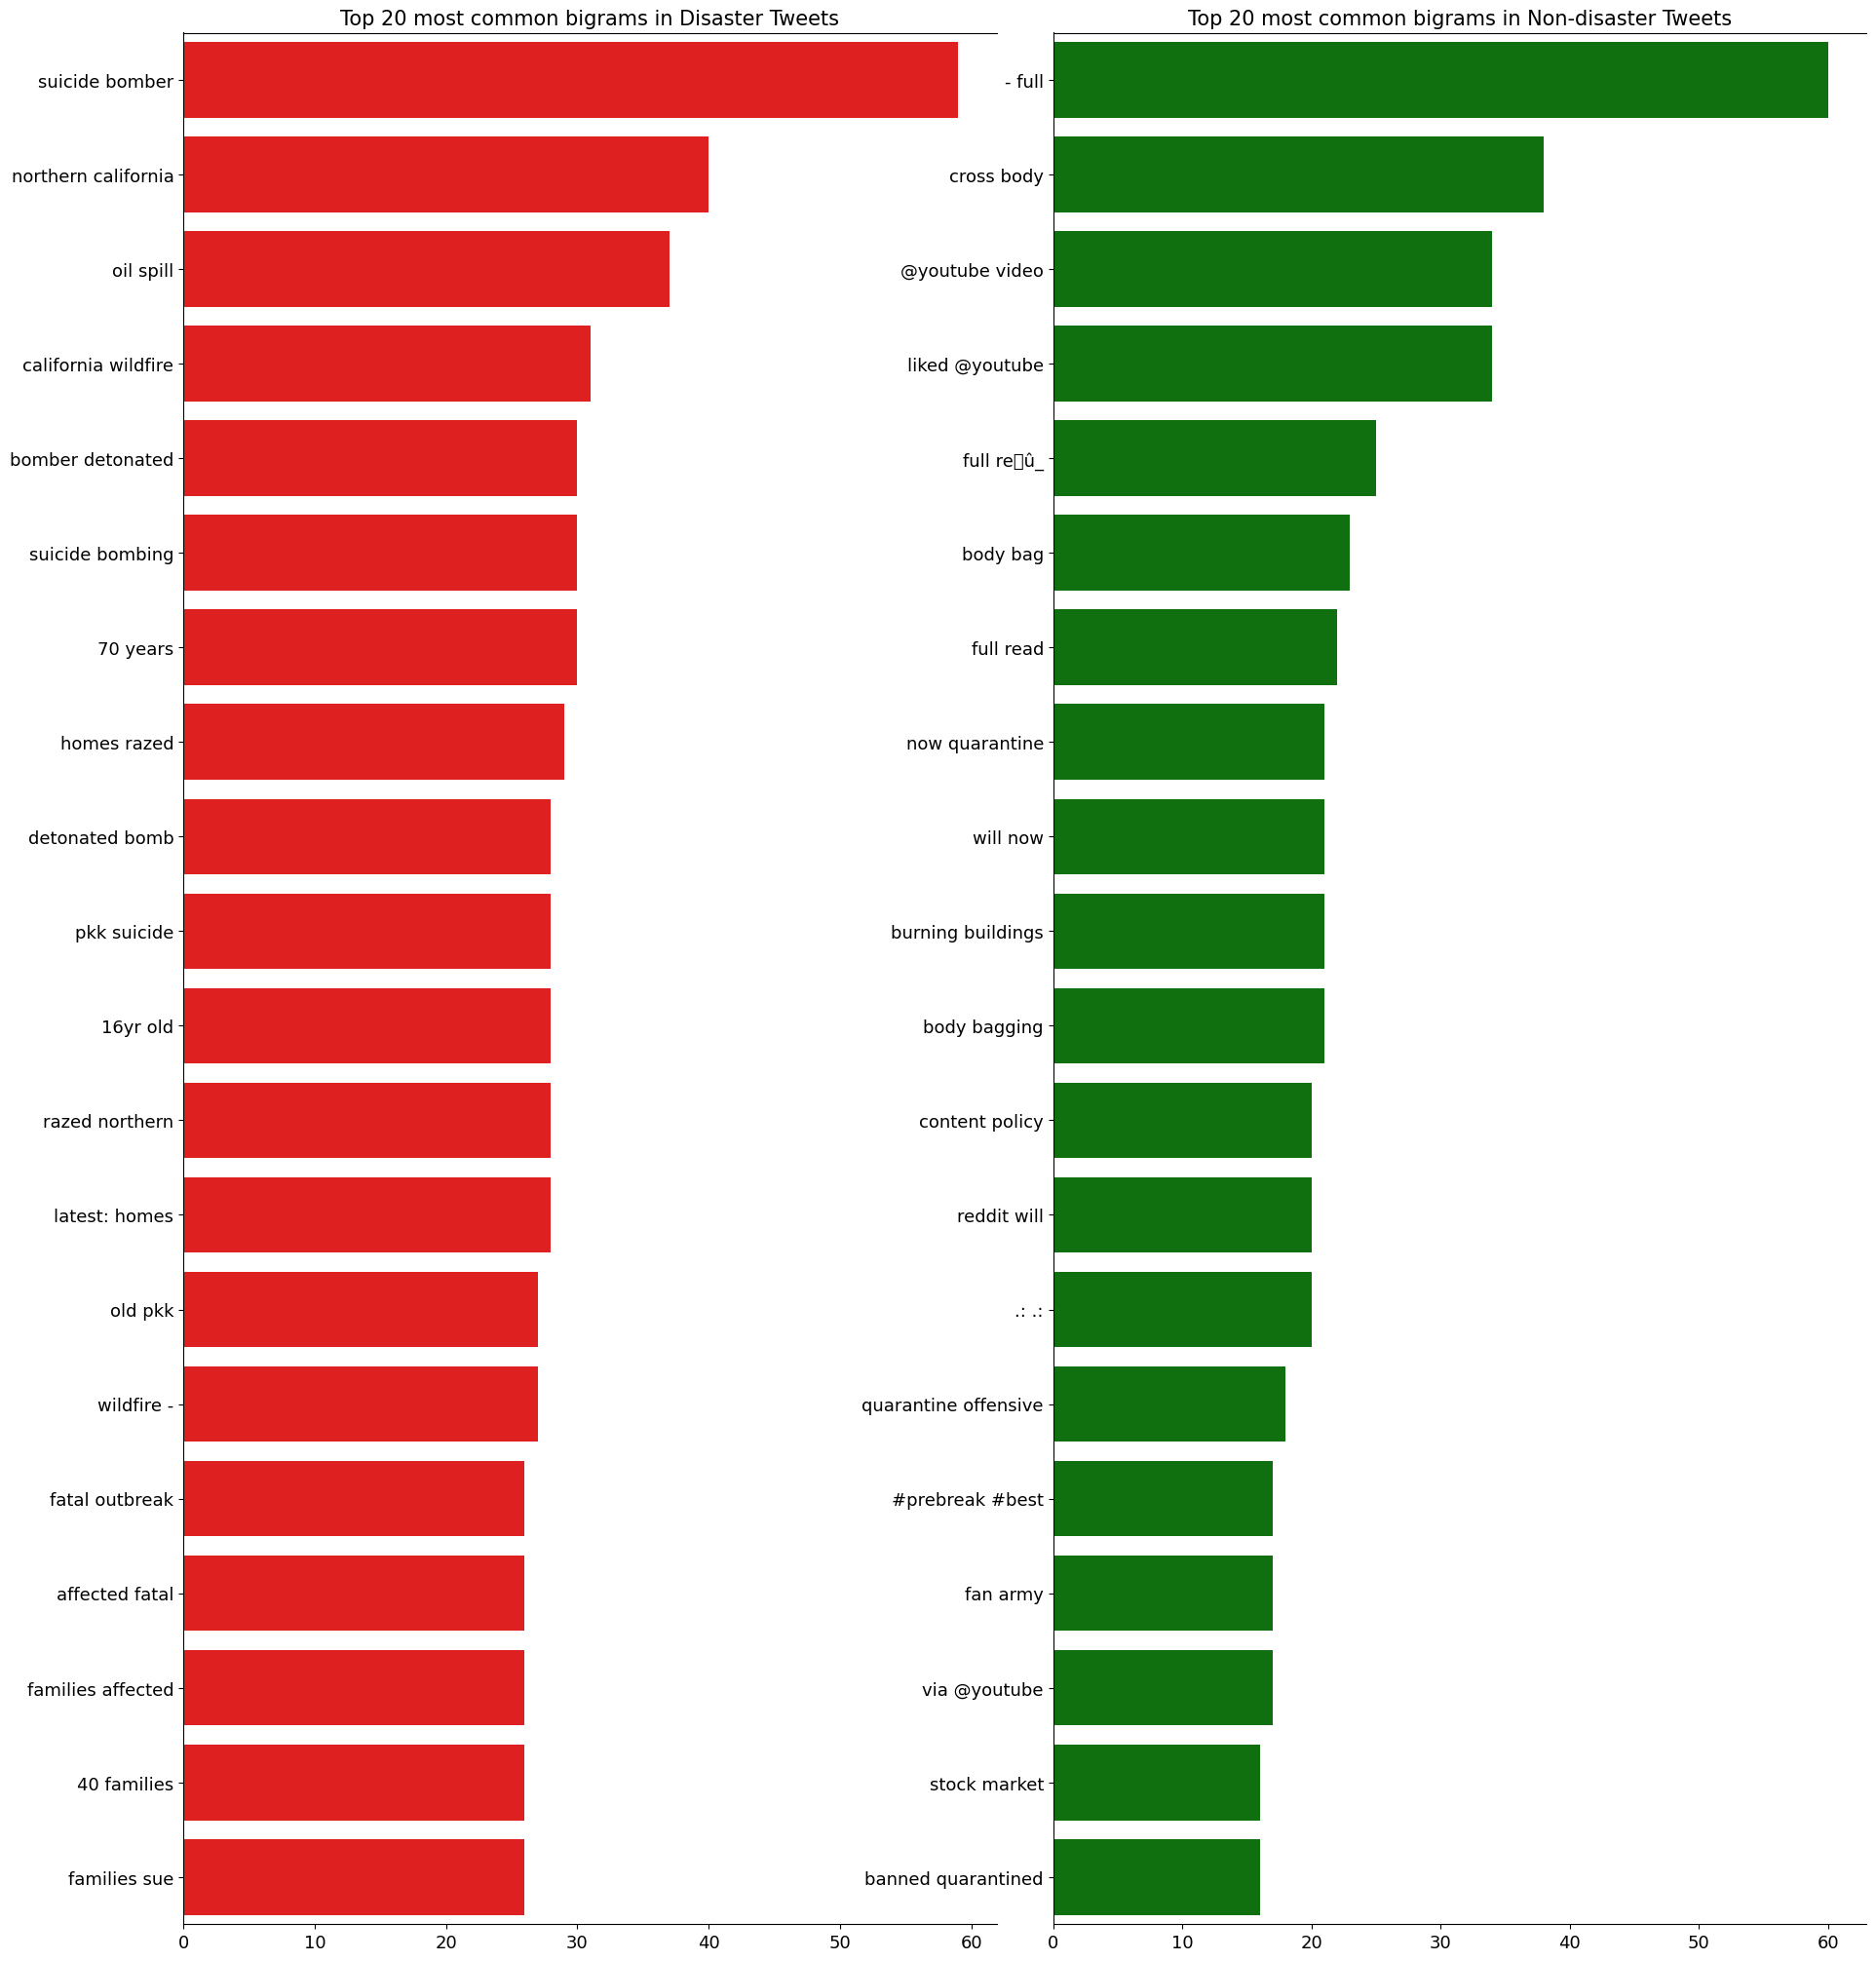

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 20), dpi=100)
plt.tight_layout()

sns.barplot(y=df_disaster_bigrams[0].values[:20], x=df_disaster_bigrams[1].values[:20], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_bigrams[0].values[:20], x=df_nondisaster_bigrams[1].values[:20], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top 20 most common bigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top 20 most common bigrams in Non-disaster Tweets', fontsize=15)

plt.show()

Observation:
* From above plot , we can see that words like burning buildings, body bag, now quarantine  in non disaster tweet but on seeing we can conclude that it may be disaster message. 
* Words like 70 years , latest: homes, 16yr old are seems to be non disaster words but along with sequence of words it will end up in disaster words

In [ ]:
## Number of words in the text ##
df_train["num_words"] = df_train["text"].apply(lambda x: len(str(x).split()))


In [ ]:
df_train[["num_words","target"]]

,num_words,target
0,13,1
1,7,1
2,22,1
3,8,1
4,16,1
...,...,...
7608,11,1
7609,20,1
7610,8,1
7611,19,1


In [ ]:
df_train1=df_train[df_train["target"]==1]
df_train0=df_train[df_train["target"]==0]

df_train1["num_words"].value_counts()

18    277
17    243
11    221
13    218
15    211
14    207
19    191
16    191
20    186
12    186
10    149
9     143
8     133
21    133
22    126
23     89
7      83
24     57
6      52
25     42
5      39
4      24
26     22
27     19
3      13
28      6
2       4
29      4
30      2
Name: num_words, dtype: int64

In [ ]:
df_train0["num_words"].value_counts()

11    276
16    260
17    251
14    243
12    229
13    227
20    223
9     220
18    217
15    214
19    199
10    185
21    163
8     160
7     159
22    153
6     134
24    132
23    131
5     120
4      91
25     87
26     76
3      62
27     41
28     35
2      30
29      9
1       8
30      4
31      3
Name: num_words, dtype: int64

Observation :
* Length of words is almost equal for disaster and non disaster tweets

#Overall EDA Summary:

* Out of 7613 train datas, 57%(4342) belongs to class 0(not a disaster text) and 42%(3271) belongs to class 1 (disaster tweet)
*Both in train and test datasets, 0.8% of keywords has NAN Value
*In train datasets, 49.86% of location has NAN Value and in test datasets, 51.20% of location has NAN Value
*Number of unique words in keyword is 221(2.9%) out of 7552 keywords available in train datasets
*More number of tweets from new york are disaster tweet than non disaster
*More number of disaster tweet are sent from newyork, USA and london location
*Number of unique words in location is 3341(43.8%) out of 7613 location available in train datasets
* In our train datasets we have totally 27983 unique words
*More number of tweets text are in range of 10-20 word length both in disaster and non_disaster 
*Some words like emergency, @amp, people are occurs in both the tweets (disaster/ & non disaster).Need to build effective model to undertand the sequence of words

# lets do some preprocessing and extract some features for building the model